In [1]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('dark_background')

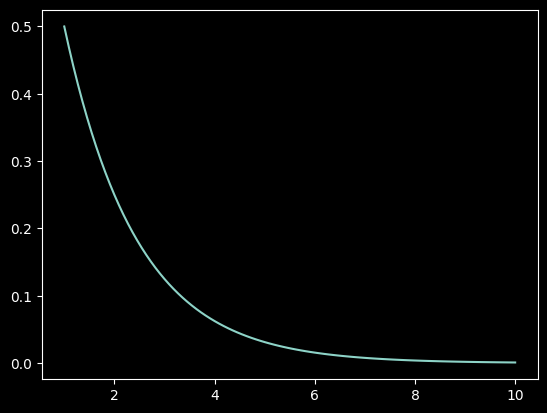

In [3]:
# -w = q^i => q = (0, 1)
dots = np.linspace(1, 10, 100)
q = 0.5
value = list(map(lambda x: q**x, dots))

plt.plot(dots,  value)
plt.show()

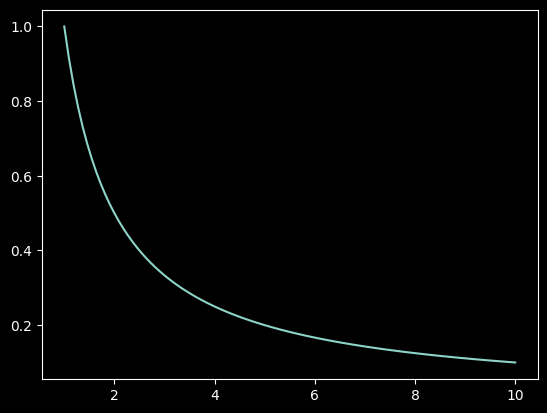

In [4]:
# -w = 1/i
dots = np.linspace(1, 10, 100)
value = list(map(lambda x: 1/x, dots))
plt.plot(dots, value)
plt.show()

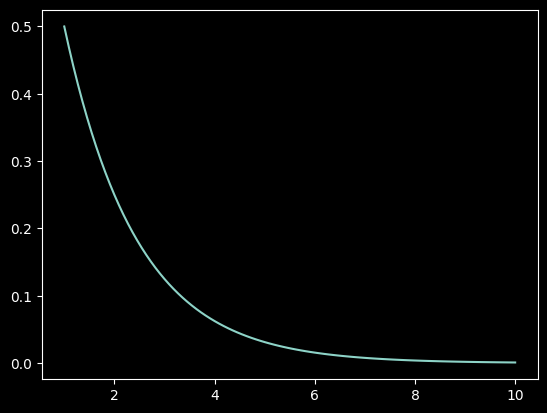

In [5]:
# -w = q^d, q = (0, 1)
dots = np.linspace(1, 10, 100)
q = 0.5
value = list(map(lambda d: q**d, dots))
plt.plot(dots, value)
plt.show()

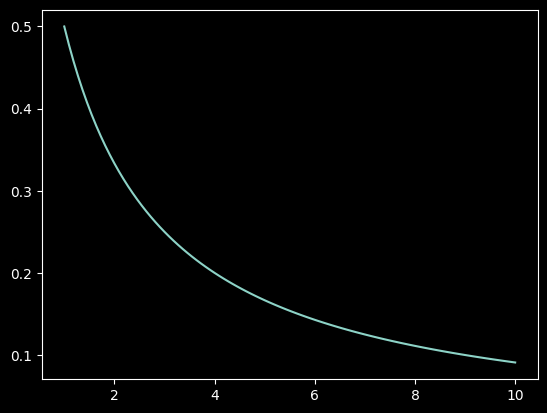

In [6]:
# -w = 1 / (d + a)

dots = np.linspace(1, 10, 100)
a = 1
value = list(map(lambda d: 1 / (d + a), dots))
plt.plot(dots, value)
plt.show()

In [7]:
# Algorithm KNN
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from matplotlib.colors import ListedColormap

In [8]:
X, y = load_iris(return_X_y=True)

X = X[:, :2]
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1, stratify=y)
X_train.shape, X_test.shape

((120, 2), (30, 2))

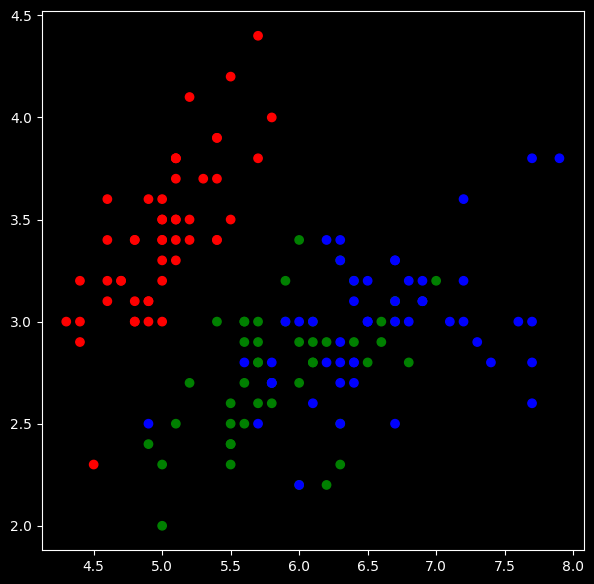

In [15]:
cmap = ListedColormap(['red', 'green', 'blue'])
plt.figure(figsize=(7, 7))

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.show()

In [16]:
# euclidean metric
def e_metrics(x1, x2):
    distance = sum(np.square(x1 - x2))
    return distance

In [17]:
{class_item: 0 for class_item in set(y_train)}

{0: 0, 1: 0, 2: 0}

In [ ]:
`